In [1]:
import glob
import numpy as np

from keyrover.vision import *
from keyrover import *

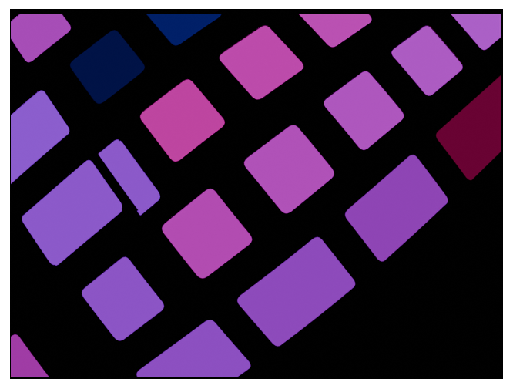

In [3]:
paths = glob.glob(f"{RAW_MASKS}/*.png")
mask_path = paths[4]
image_path = f"{SEGMENTATION_DATASET}/{os.path.basename(mask_path).removesuffix('.png')}.jpg"

image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("RGB")

binary = np.array(mask.convert("L")) > 1
classes = np.array(mask)

imshow(classes)

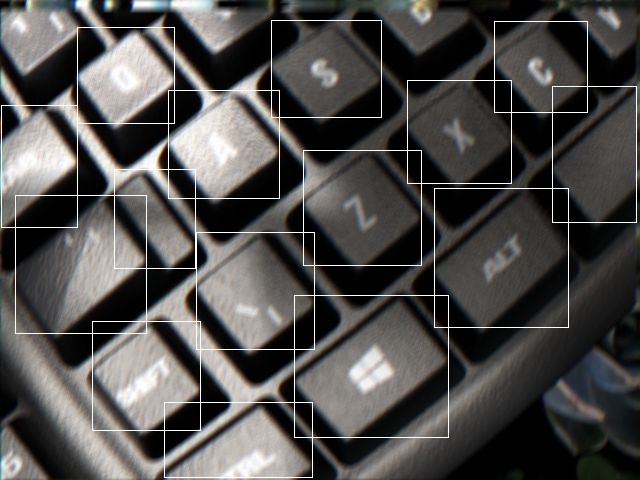

In [4]:
newimg = np.array(image)

OUTLIER_THRESHOLD = -0.5

rects = extract_rects(binary)
areas = np.array(list(map(lambda rect: rect[-1] * rect[-2], rects)))

d = areas - np.median(areas)
mdev = np.median(areas)
s = d / mdev if mdev else np.zeros(len(d))

rects = zip(s, rects)
rects = list(filter(lambda rect: rect[0] > OUTLIER_THRESHOLD, rects))

_, rects = zip(*rects)

for rect in rects:
    cv2.rectangle(newimg, rect, (255, 255, 255), 1)

Image.fromarray(newimg)

In [5]:
len(rects)

15

In [7]:
colors = set()

for x, y, w, h in rects:
    crop = classes[y:y + h, x:x + w]
    binary_crop = binary[y:y + h, x:x + w]

    crop = np.vstack(crop)
    crop = crop[binary_crop.flatten() == 1]
        
    color = tuple(np.quantile(crop, 0.75, axis=0))
    colors.add(color)

len(colors)

14